# 1.  Using the titanic data set create a model with the 3 most important independent variable that is gender age and fare to get a dependent variable as survived and perform prediction.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

## Creating Model

In [2]:
# Loading training dataset
titanic_train = pd.read_csv("dataset/train.csv")

In [3]:
# Handling null values, if any
new_age_var = np.where(titanic_train["Age"].isnull(),28,titanic_train["Age"])

In [4]:
titanic_train["Age"] = new_age_var

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
# Converting string into catgeory
encoded_gender = label_encoder.fit_transform(titanic_train["Sex"])

In [7]:
# Initialising Decision Tree
tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [8]:
predictors = pd.DataFrame([encoded_gender, titanic_train["Age"], titanic_train["Fare"]]).T

In [9]:
# Model created
tree_model.fit(X=predictors,y=titanic_train["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
with open("Dtree_titanic.dot","w") as f:
    f = tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f)

In [11]:
# Model accuracy
tree_model.score(X=predictors,y=titanic_train["Survived"])

0.8706411698537683

In [12]:
text_representation = tree.export_text(tree_model,feature_names=["Sex","Age","Fare"])
print(text_representation)

|--- Sex <= 0.50
|   |--- Fare <= 48.20
|   |   |--- Fare <= 27.82
|   |   |   |--- Fare <= 25.70
|   |   |   |   |--- Fare <= 24.07
|   |   |   |   |   |--- Fare <= 10.48
|   |   |   |   |   |   |--- Fare <= 8.04
|   |   |   |   |   |   |   |--- Fare <= 6.99
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Fare >  6.99
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  8.04
|   |   |   |   |   |   |   |--- Age <= 19.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  19.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  10.48
|   |   |   |   |   |   |--- Fare <= 14.13
|   |   |   |   |   |   |   |--- Age <= 53.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  53.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  14.13
|   |   |   |   |   |   |   |--- Fare <= 15.37
|   |   |   |   |   

## Prediction

In [13]:
# Loading test dataset
titanic_test = pd.read_csv("dataset/test.csv")

In [14]:
# Handling null values, if any
new_age_var = np.where(titanic_test["Age"].isnull(),28,titanic_test["Age"])

In [15]:
titanic_test["Age"] = new_age_var

In [16]:
label_encoder = preprocessing.LabelEncoder()

In [17]:
# Converting string into catgeory
encoded_gender = label_encoder.fit_transform(titanic_test["Sex"])

In [18]:
test_features = pd.DataFrame([encoded_gender,titanic_test["Age"],titanic_test["Fare"]]).T

In [19]:
# Prediction
test_preds = tree_model.predict(X=test_features)

In [20]:
Predicted_Output = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],"Survived":test_preds})

In [21]:
Predicted_Output.to_csv("dataset/Output.csv",index=False)

## Decision Tree

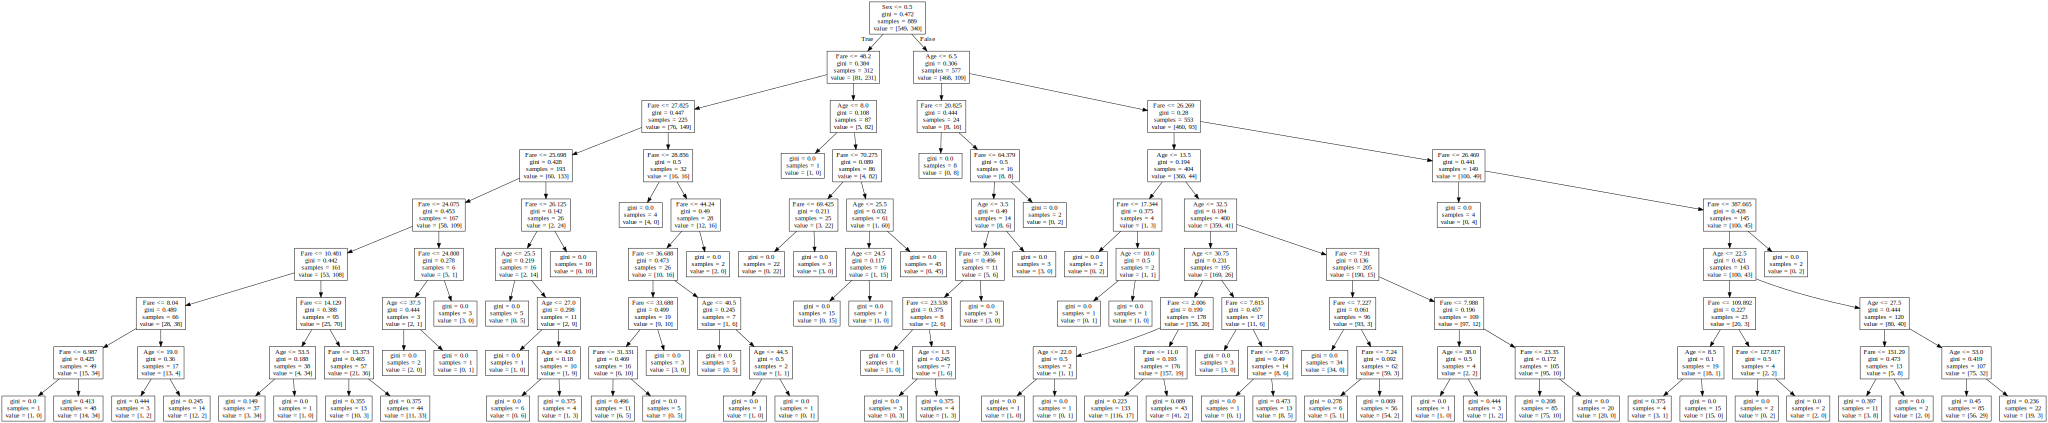

In [22]:
graph = Source(tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f))

display(SVG(graph.pipe(format='svg')))